# Example 1

## Import libraries

In [1]:
import numpy as np
import operator
import matplotlib.pyplot as plt

## Create training data and set corresponding labels

In [2]:
def create_dataset():
    group = np.array([[1.0, 2.0], [1.2, 0.1], [0.1, 1.4], [0.3, 3.5]])
    labels = ['A','A','B','B']
    return group, labels

## Create KNN classifier

In [3]:
def classify(input, dataSet, label, k):
    dataSize = dataSet.shape[0]
    
    # copy input as dataSet
    diff = np.tile(input, (dataSize, 1)) - dataSet
    sqdiff = diff**2
    
    # sum all column vecto into a new column vector
    squareDist = np.array([sum(x) for x in sqdiff])
    dist = squareDist**0.5
    
    # sorted(distance), argsort() can return index based on the element value with ascending order
    sortedDistIndex = np.argsort(dist)
    
    classCount = {}
    for i in range(k):
        voteLabel = label[sortedDistIndex[i]]                     # 因为已经对距离进行排序，所以直接循环sortedDistIndx
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1  # 对选取的k个样本所属的类别个数进行统计
        
    # pick category which appears mostly
    maxCount = 0
    for key, value in classCount.items():
        if value > maxCount:
            maxCount = value
            classes = key
    
    return classes

## Data visualization

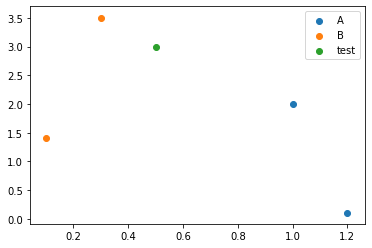

B


In [4]:
def draw_pic(input):
    plt.scatter([1.0,1.2],[2.0,0.1],label='A')
    plt.scatter([0.1,0.3],[1.4,3.5],label='B')
    plt.scatter(input[0],input[1],label='test')
    plt.legend()
    plt.show()
data, labels = create_dataset()
input = [0.5, 3.0]
draw_pic(input)
print(classify(input,data,labels,2))

# Example 2

## Import libraries

In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Create training data and set corresponding labels

**Object: create several groups of dataset, each group can be called one type**

**函数逻辑:**
- 将x轴分段，每个段设一个中心的，所有的中心点用cores存储。
- 设置每个数据中心点core的类别，由中心点在一定范围内随机产生数据，并将这些数据设为和core一样的类别
- 所以每类的数据会简单的被X轴的每段大致分开

In [6]:
def makeKNNData(colnum, clsnum, nums, cores = []):
    '''
    colnum：单个数据拥有特征数量（包括数据的分类）；
    clsnum：共有多少种分类；
    nums：一个元组，表示每个类别希望产生多少数据样本，如colnum为5，nums为[56, 69, 60, 92, 95]；
    cores：非必要参数，手动给出只是用于测试，cores提供每类的中心点，以中心点为依据产生该类数据。
    
    '''

    dataSet = np.zeros((sum(nums),colnum))        # 初始化数据集，用于存放随后生成的所有数据
    n = 0                                         # 记录生成数据的下标
    step = 20/clsnum                              # 假定X坐标轴只显示0~20的范围，step为X轴分段后的段长
    for j in range(clsnum):                       # 循环生成各个类数据
        try:
            core = cores[j]                       # 如果cores没有给出则，则出错，跳至except执行
        except IndexError :
            core = np.random.rand(1,3)            # 中心点为array([[x1,x2,c]])，c用于表示类别，这里产生的是1*3的二维数组
            core[0][0] =j*step + core[0][0]*step  # 将x1限制在各段中
            core[0][1] *=15                       # 将x2即y轴限制在0~15范围内
            core[0][2] = j                        # 设置类别
            cores.append(core)
        for i in range(nums[j]):                                    # 按nums中指定了每类数据的数量，用循环生成。
            point= core[0][:2] + np.random.rand(1,2)*step -step/2   # 产生点point（x,y)，x以中心点在（core_x - step/2, core_x + step/2)范围随机波动，y同理。
            row = np.column_stack((point,core[0][2]))               # 加上类别成为一个数据
            dataSet[n] = row
            n +=1
            i +=1

        j +=1

    print("print cores:", cores)
    return dataSet

## Create KNN classifier

In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def KNNClassify(labelData, predData, k):
    '''
    labelData: train dataset with labels
    predData: test dataset needed be predicted
    ''' 

    labShape = labelData.shape
    for i in range(predData.shape[0]):                         # 以predData的每行数据进行遍历
        iData = predData[i]
        iDset = np.tile(iData, (labShape[0],1))                # 将iData重复，扩展成与labelData同形的矩阵
        
        # Euclidean distance = sqrt((x1-x2)^2 + (y1-y2)^2)
        diff = iDset[..., :-1] - labelData[..., :-1]
        diff = diff ** 2
        distance = np.sum(diff, axis = 1)
        distance = distance ** 0.5
        sortedIND = np.argsort(distance)
        
        # 计算距离最近的前k个标记数据的类别
        classCount = { }
        for j in range(k):  
            voteLabel = labelData[sortedIND[j], -1]
            classCount[voteLabel] = classCount.get(voteLabel, 0) + 1
        
        # return key name with most type 类别最多的，返回键名（类别名）
        maxcls = max(classCount, key=classCount.get)   
        predData[i][...,-1] = maxcls

    return predData

## Data visualization

print cores: [array([[ 3.62636867, 11.11370029,  0.        ]]), array([[7.46593413, 0.5511444 , 1.        ]]), array([[8.0297744 , 5.54003975, 2.        ]]), array([[15.88393862,  1.80297617,  3.        ]]), array([[16.52782768,  7.72055129,  4.        ]])]


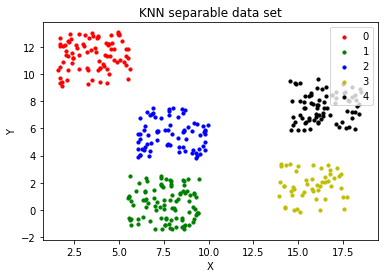

In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def showFigure(dataSet, clsnum):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)            # The interface only needs to display one view
    ax.set_title('KNN separable data set')
    plt.xlabel('X')
    plt.ylabel('Y')

    colors = ['r','g','b','y','k']           # define show colors
    for i in range(clsnum):
        idx = np.where(dataSet[:,2] == i)    # retrieve index of each type 查询每类的索引号
        ax.scatter(dataSet[idx,0], dataSet[idx,1], marker='o', color=colors[i%5], label=i, s=10)

    plt.legend(loc = 'upper right')
    plt.show()


# test which needs combine makeKNNData() function
classnum = 5
nums = np.random.randint(50, 100, classnum)   # e.g.: array([56, 69, 60, 92, 95]) between 50 and 100
dataSet = makeKNNData(3, classnum,nums)
showFigure(dataSet, classnum)